In [2]:
import matplotlib.pyplot as plt         # Common python package for plotting
import numpy as np                      # For many numerical operation (e.g. arrays, sine functions, maths constants)
import pandas as pd                     # Common python dataframe package used in industry and academia
from scipy.optimize import curve_fit    # Commonly used fitting package - has some tricky syntax but useful to learn to use.

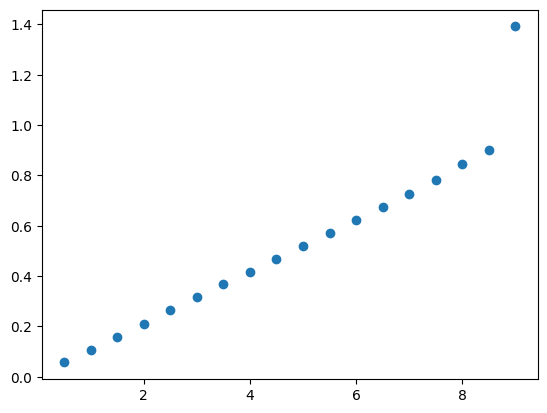

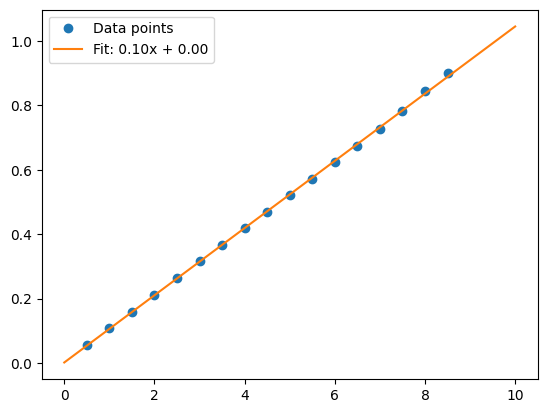

Fit coefficients:
a (slope): 0.10 ± 0.00
b (intercept): 0.00 ± 0.00


In [3]:
# This is an example of curve fitting using some made-up data.
# Use this as a guide to fit your own data in the next section.
################################################################################
# Curve fitting EXAMPLE
################################################################################


Descriminator_settings = np.linspace(0.5,9.0,18)
Example_voltages = [57, 108, 160, 211, 264, 316, 368, 418, 468, 521, 571, 623, 674, 726, 782, 846, 900, 1392] #mV
# convert to V
Example_voltages = [v/1000 for v in Example_voltages]

plt.plot(Descriminator_settings, Example_voltages, 'o', label='Data points')
plt.show()

# We define a fitting function to fit to the data. From the plot, it looks like a straight line is a good fit.
# So we define a straight line function: y = a*x + b, where a is the slope and b is the y-intercept.
# The fitting function must take the independent variable as the first argument and the parameters to fit as subsequent arguments.

# Defining the fitting function (REMEMBER: always use def function_name(x, parameters...))
def straightLineFit(x, a, b):
    return a * x + b

# Preparing the data for fitting (this is optional, but often useful to exclude outliers or specific points)
x_data = Descriminator_settings[:-1]  # Exclude the last point for fitting. The -1 index means "up to but not including the last element"
y_data = Example_voltages[:-1]       # Exclude the last point for fitting

################################################################################
# Curve fitting explanation
################################################################################
# We can use curve fitting to find the best fit line to this data and extract the coefficients and their uncertainties.

""" 
The curve_fit function from scipy.optimize is used to fit a user-defined function (in this case, straightLineFit above) to the data.
(see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html for more details)

Usage syntax: curve_fit(function, xdata, ydata, p0=None, sigma=None, absolute_sigma=False).
- 'function' is the model to fit.
- 'xdata' and 'ydata' are the arrays of data points.
to import the fit, you can add optional arguments:
- 'p0' is an optional initial guess for the parameters.
- 'sigma' is an optional array of uncertainties in ydata.
- 'absolute_sigma' indicates if sigma is to be treated as absolute or relative.

curve_fit returns the optimal parameters (coefficients) and the covariance matrix as two outputs (often named popt and pcov).

The covariance matrix provides an estimate of the uncertainties in the fitted parameters. 
The square root of the diagonal elements gives the standard deviation (1-sigma uncertainty) for each parameter.
"""

coefficients, covariance = curve_fit(straightLineFit, x_data, y_data)
uncertainties = np.sqrt(np.diag(covariance))  # Extracting the uncertainties from the covariance matrix
# or 
slope_uncertainty = np.sqrt(covariance[0, 0])  # Uncertainty in the slope (a)
intercept_uncertainty = np.sqrt(covariance[1, 1])  # Uncertainty in the intercept (b)

# Plotting the data and the fit

x_fit = np.linspace(0, 10, 100)  # Create a smooth line for the fit.
y_fit = straightLineFit(x_fit, *coefficients)  # Calculate the y values using the fitted coefficients in the fitting function.

plt.plot(x_data, y_data, 'o', label='Data points')  # Plotting the actual data points (you could also plot the original data if you prefer to include the outliers)
plt.plot(x_fit, y_fit, '-', label='Fit: {:.2f}x + {:.2f}'.format(*coefficients))  # the *coefficients syntax unpacks the list of coefficients into separate arguments for the function without needing to know how many there are or type them all out.
plt.legend()
plt.show()

# If you want to print the fit results with uncertainties
print("Fit coefficients:")
print("a (slope): {:.2f} ± {:.2f}".format(coefficients[0], uncertainties[0]))
print("b (intercept): {:.2f} ± {:.2f}".format(coefficients[1], uncertainties[1]))


################################################################################
# End of curve fitting EXAMPLE

# please proceed to the next section of the notebook and use this as a guide to fit your own data.
